In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image 
import tensorflow.keras.backend as K
from numpy.linalg import norm
# Display
from IPython.display import Image as Image1
from IPython.display import display


import matplotlib.pyplot as plt
import matplotlib.cm as cm

2023-05-29 16:33:22.459824: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 16:33:23.888604: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-29 16:33:23.888867: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-29 16:33:26.939177: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
#model_builder = keras.applications.xception.Xception
model_builder = keras.applications.inception_v3
img_size = (299, 299)
preprocess_input = keras.applications.inception_v3.preprocess_input
decode_predictions = keras.applications.inception_v3.decode_predictions

#model = InceptionV3(weights='imagenet', include_top=False)

#last_conv_layer_name = "block14_sepconv2_act"
#last_conv_layer_name = "conv2d_204"

# The local path to our target image



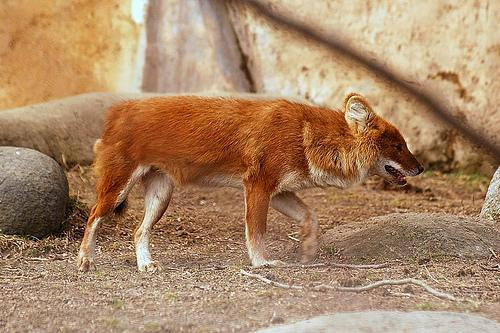

In [3]:
#img_path = "n02085620/n02085620_7.JPEG"
img_path = "n02115913/n02115913_1897.JPEG"
#img_path = "elephant.jpg"
#img_path = keras.utils.get_file(
 #   "african_elephant.jpg", "https://i.imgur.com/Bvro0YD.png"
#)

display(Image1(img_path))

In [18]:

model = InceptionV3(weights='imagenet')


In [19]:
model.layers[-14].name

'conv2d_281'

In [15]:

x_gray.shape

(333, 500)

In [20]:
from PIL import Image
from numpy import asarray

img_path = "n02115913/n02115913_1897.JPEG"
data = Image.open(img_path)
rotate_data = data.rotate(180)  

rotate_img = keras.preprocessing.image.array_to_img(rotate_data)
rotate_img.save('rotate_test.jpg')

img_array = keras.preprocessing.image.img_to_array(rotate_img)

img_array.shape

(333, 500, 3)

In [6]:
from PIL import Image
from numpy import asarray
import math

def convert_to_gray(img_path):
    
    img_ = Image.open(img_path)
    num_img = asarray(img_)
    

    
    img = image.load_img(img_path, target_size=(num_img.shape[0], num_img.shape[1]))
    x = image.img_to_array(img)

    x_gray = 0.299*x[:,:,0] + 0.587*x[:,:,1] + 0.114*x[:,:,2]

    x_gray3d = np.zeros(shape = (num_img.shape[0], num_img.shape[1], 3))
    x_gray3d[:,:,0] = x_gray
    x_gray3d[:,:,1] = x_gray
    x_gray3d[:,:,2] = x_gray

    gray_img = keras.preprocessing.image.array_to_img(x_gray3d)
    gray_img.save("gray_image1.jpg")


    return gray_img
    

    

In [87]:
def folder_to_gray(dir_list):
    path = "/mnt/c/Users/soaba/code/CNN/n02116738"
    for x in dir_list:
        gray_img = convert_to_gray(path + '/'+ x)
        gray_img.save("n02116738_gray"+"/"+x)

In [89]:
folder_to_gray(dir_list)

In [32]:
import os
path = "/mnt/c/Users/soaba/code/CNN/n02116738"
dir_list = os.listdir(path)

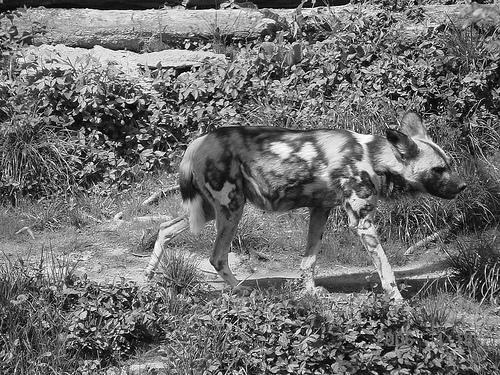

In [77]:
result = convert_to_gray(path+'/'+dir_list[71])

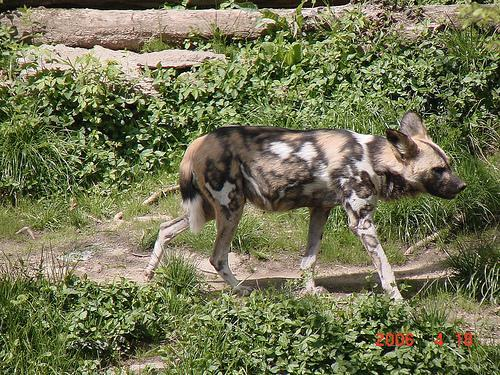

In [78]:
display(Image1(path+'/'+dir_list[71]))

In [2]:
img_path = "data_folders_gray/n00007846_gray/n00007846_109518.JPEG"

img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)


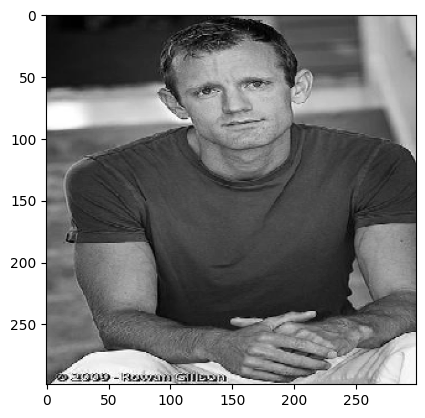

In [8]:
plt.imshow(x[:,:,1])
plt.gray()

1/1 [==============================] - 2s 2s/step
[[('n02326432', 'hare', 0.64742106), ('n02325366', 'wood_rabbit', 0.13091354), ('n02423022', 'gazelle', 0.07400535), ('n02356798', 'fox_squirrel', 0.018126307), ('n02417914', 'ibex', 0.007411627)]]


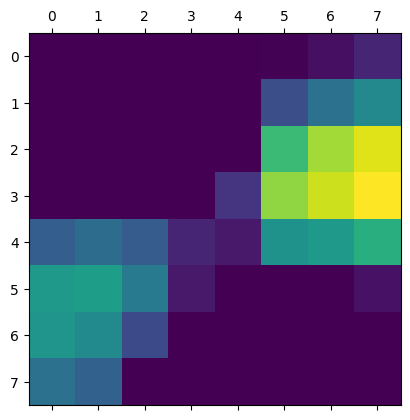

In [21]:
dim = 299
img_path = "rotate_test.jpg"
#img_path = path+'/'+dir_list[71]
img = image.load_img(img_path, target_size=(dim, dim))
x = image.img_to_array(img)
rec = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print(decode_predictions(preds))

with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer('conv2d_281')
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((8, 8))
plt.matshow(heatmap)
plt.show()

In [10]:
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)
img.shape


(333, 500, 3)

In [13]:
A = np.zeros(shape= (8,8,3))
A[:,:,0] = heatmap
A[:,:,1] = heatmap
A[:,:,2] = heatmap

heatmap_test = keras.preprocessing.image.array_to_img(A)
heatmap_test = heatmap_test.resize((img.shape[1], img.shape[0]))
heatmap_test.save("heatmap_test.jpg")

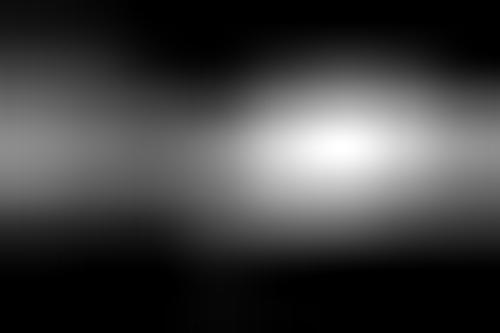

In [14]:
display(Image1("heatmap_test.jpg"))

In [16]:
from PIL import Image
from numpy import asarray
import math



def num_array(img_path):
    # open image as numpy array

    img_ = Image.open(img_path)
    num_img = asarray(img_)
    return num_img
B = num_array("heatmap_test.jpg")

In [22]:
B[170, 350,0]

224

1/1 [==============================] - 2s 2s/step
[[('n02115913', 'dhole', 0.9727472), ('n02114712', 'red_wolf', 0.00053046463), ('n02116738', 'African_hunting_dog', 0.00026346507), ('n02115641', 'dingo', 0.00022033851), ('n02486261', 'patas', 0.00021914653)]]


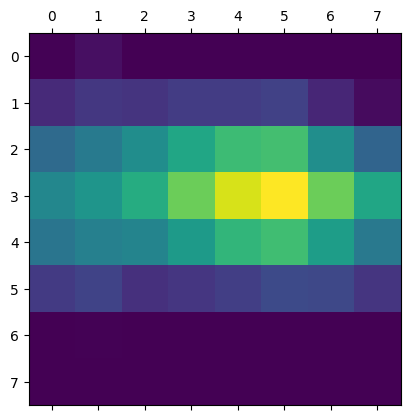

In [6]:
dim = 299
#img_path = "gray_image1.jpg"
#img_path = "n02116738/n02116738_1105.JPEG"
img = image.load_img(img_path, target_size=(dim, dim))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print(decode_predictions(preds))

with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer('conv2d_93')
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((8, 8))
plt.matshow(heatmap)
plt.show()

In [38]:
def jet_heatmap_gray(heatmap):

    A = np.zeros(shape= (8,8,3))
    A[:,:,0] = heatmap
    A[:,:,1] = heatmap
    A[:,:,2] = heatmap

    heatmap_test = keras.preprocessing.image.array_to_img(A)
    heatmap_test = heatmap_test.resize((img.shape[1], img.shape[0]))
    heatmap_gray = keras.preprocessing.image.img_to_array(heatmap_test)

    return heatmap_gray[:,:,0]


    

/tmp/ipykernel_400/136107492.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


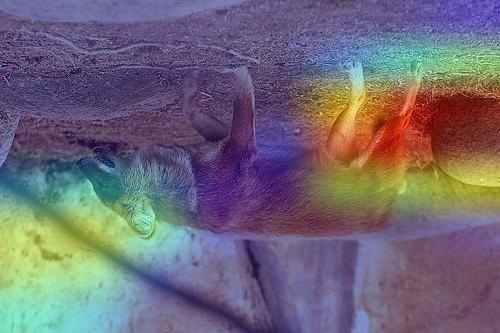

In [22]:
#Create a superimposed visualization
img_path = "rotate_test.jpg"
#img_path = path+'/'+dir_list[88]
def save_and_display_gradcam(img_path, heatmap, cam_path="cam_testz1.jpg", alpha=0.8):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    return display(Image1(cam_path)), jet_heatmap

display_imag, jet_h = save_and_display_gradcam(img_path, heatmap)
display_imag


In [37]:
jet_h[50, 100,0]

0.0

In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image 
import tensorflow.keras.backend as K
from numpy.linalg import norm
# Display
from IPython.display import Image as Image1
from IPython.display import display


import matplotlib.pyplot as plt
import matplotlib.cm as cm



#model_builder = keras.applications.xception.Xception
model_builder = keras.applications.inception_v3
img_size = (299, 299)
preprocess_input = keras.applications.inception_v3.preprocess_input
decode_predictions = keras.applications.inception_v3.decode_predictions


#last_conv_layer_name = "block14_sepconv2_act"
#last_conv_layer_name = "conv2d_204"

# The local path to our target image


2023-03-15 19:39:49.261488: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 19:39:49.910797: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-15 19:39:49.910857: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-15 19:39:53.039916: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
model = InceptionV3(weights='imagenet')

2023-03-15 19:39:59.942989: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-15 19:39:59.943143: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-15 19:39:59.943249: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-88TBBTR): /proc/driver/nvidia/version does not exist
2023-03-15 19:39:59.944481: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model.layers[-14].name

'conv2d_93'

In [4]:
from PIL import Image
from numpy import asarray
import math



def num_array(img_path):
    # open image as numpy array

    img_ = Image.open(img_path)
    num_img = asarray(img_)
    return num_img

def red_regions(jet_heatmap):
    rr = np.argwhere((jet_heatmap[:,:,0] >= 200) & (jet_heatmap[:,:,0]> jet_heatmap[:,:, 1]) & (jet_heatmap[:,:,0] > jet_heatmap[:,:,2]) & (jet_heatmap[:,:,1] <= 10) & (jet_heatmap[:,:,2] <= 10))

    return rr

def array_coord(jet_heatmap, perc, dim= 299):
    # Obtain red regions in heat map of high intensity
    rr = red_regions(jet_heatmap)
    coord_arr = []
    for coord in rr:
        coord_arr.append((coord, max(jet_heatmap[coord[0], coord[1]]) ))
    # sort a list of ordered tuples
    n = len(coord_arr)

    coord_arr.sort(key= lambda x: x[1], reverse = True)

    B = list(zip(*coord_arr))[0]
    
    return coord_arr, np.asarray(B)[0:math.ceil(perc*n/100)]
        

def image_patches(img_path, jet_heatmap, perc, dim=299):
    
    # Obtain significant 3x3 patches of image features
    if len(array_coord(jet_heatmap, perc, dim=299)[0])!=0:
        _, coord = array_coord(jet_heatmap, perc, dim=299)
        num_img = num_array(img_path)
        list_patches = []
        for x in coord:
            if len(num_img[x[0]:(x[0]+3), x[1]:(x[1]+3)].flatten())==27:
                list_patches.append(num_img[x[0]:(x[0]+3), x[1]:(x[1]+3)])
    
    return list_patches




def get_heatmap(img_path, dim = 299):
    
    # Get 8x8 heatmap feature
    
    dim = 299


    img = image.load_img(img_path, target_size=(dim, dim))
    #model = InceptionResNetV2(weights='imagenet')

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #preds = model.predict(x)


    with tf.GradientTape() as tape:
        last_conv_layer = model.get_layer('conv2d_93')
        iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
        model_out, last_conv_layer = iterate(x)
        class_out = model_out[:, np.argmax(model_out[0])]
        grads = tape.gradient(class_out, last_conv_layer)
        pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = heatmap.reshape((8, 8))
    return heatmap
    #plt.matshow(heatmap)
    #plt.show()


def get_jet_heatmap(img_path, dim= 299):

    heatmap = get_heatmap(img_path, dim=299 )

    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    return jet_heatmap
    

def patches_n_folder(dir_list, perc , dim=299):
    path = "/mnt/c/Users/soaba/code/CNN/n02116738"
    big_list = []
    for x in dir_list:
        jet_heatmap = get_jet_heatmap(path+'/'+x, dim=299)
        rr = red_regions(jet_heatmap)
        if len(rr)!=0:

            patches = image_patches(path+'/'+x, jet_heatmap, perc, dim=299)
            for y in patches:
                big_list.append(y)
    
    return big_list


In [6]:
result1 = patches_n_folder(dir_list, perc=50, dim=299)

/tmp/ipykernel_1055/1878921439.py:98: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


In [7]:
len(result1)

104089

In [5]:
import os
path = "/mnt/c/Users/soaba/code/CNN/n02116738"
dir_list = os.listdir(path)

In [8]:
Q = np.zeros(shape = (len(result1), 27))
for i in range(len(result1)):
    Q[i] = result1[i].flatten()


In [19]:
import pickle
# List of relevant 3x3 features in "hyena-like animals"
outfilez = open('patches_incep_dhole.pckl', 'wb')
pickle.dump(Q, outfilez)
outfilez.close()


In [1]:
import pickle
with open('patches_incep_dhole_200.pckl', 'rb') as handle:
    P= pickle.load(handle)

In [35]:
model.layers[-12].name

'conv2d_187'

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math
from sklearn.manifold import Isomap
from numpy.linalg import norm
from ripser import ripser
from persim import plot_diagrams
import warnings
warnings.filterwarnings('ignore')

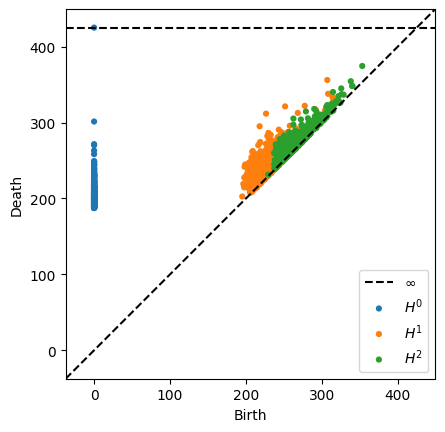

In [99]:
ripser_out_z2 = ripser(Q, coeff=2, do_cocycles = True, maxdim = 2, n_perm = 500)
dgmsz2 = ripser_out_z2['dgms']
plot_diagrams(dgmsz2, labels = ["$H^0$", "$H^1$", "$H^2$", "$H^3$"])
#plt.title("$\mathbb{Z}_{11}$ Coefficient")
#plt.savefig("Z00.png")

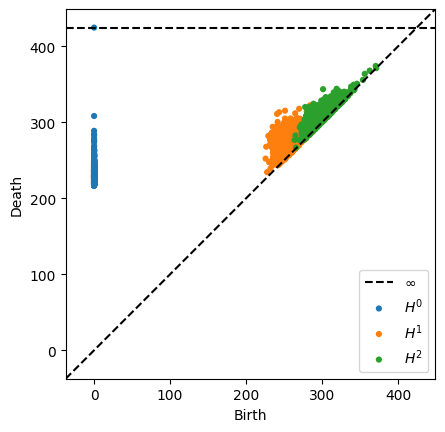

In [10]:
ripser_out_z2 = ripser(Q, coeff=2, do_cocycles = True, maxdim = 2, n_perm = 500)
dgmsz2 = ripser_out_z2['dgms']
plot_diagrams(dgmsz2, labels = ["$H^0$", "$H^1$", "$H^2$", "$H^3$"])
#plt.title("$\mathbb{Z}_{11}$ Coefficient")
#plt.savefig("Z00.png")

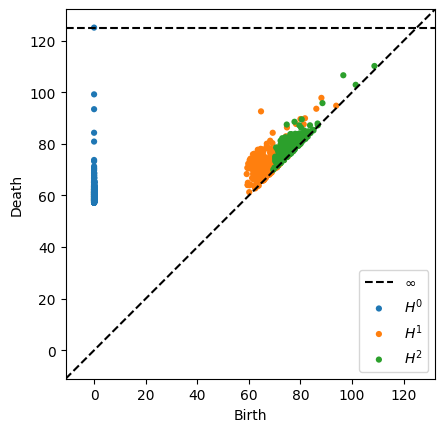

In [10]:
ripser_out_z2 = ripser(array_50, coeff=2, do_cocycles = True, maxdim = 2, n_perm = 500)
dgmsz2 = ripser_out_z2['dgms']
plot_diagrams(dgmsz2, labels = ["$H^0$", "$H^1$", "$H^2$", "$H^3$"])
#plt.title("$\mathbb{Z}_{11}$ Coefficient")
#plt.savefig("Z00.png")

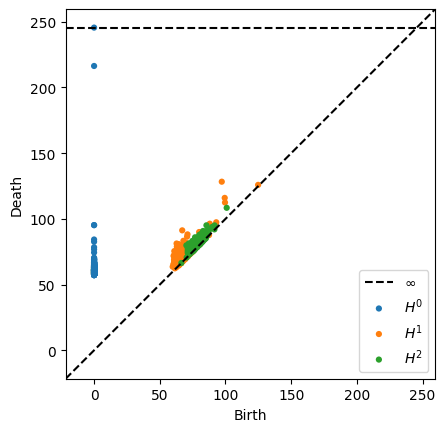

In [6]:
ripser_out_z2 = ripser(array_20, coeff=2, do_cocycles = True, maxdim = 2, n_perm = 500)
dgmsz2 = ripser_out_z2['dgms']
plot_diagrams(dgmsz2, labels = ["$H^0$", "$H^1$", "$H^2$", "$H^3$"])
#plt.title("$\mathbb{Z}_{11}$ Coefficient")
#plt.savefig("Z00.png")

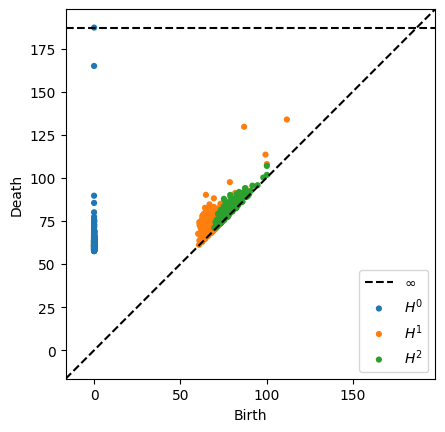

In [8]:
ripser_out_z2 = ripser(array_10, coeff=2, do_cocycles = True, maxdim = 2, n_perm = 500)
dgmsz2 = ripser_out_z2['dgms']
plot_diagrams(dgmsz2, labels = ["$H^0$", "$H^1$", "$H^2$", "$H^3$"])
#plt.title("$\mathbb{Z}_{11}$ Coefficient")
#plt.savefig("Z00.png")

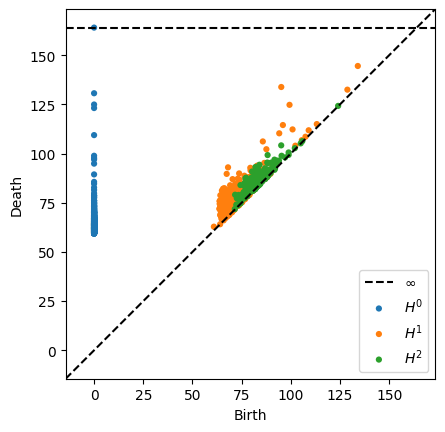

In [7]:
ripser_out_z2 = ripser(array_5, coeff=2, do_cocycles = True, maxdim = 2, n_perm = 500)
dgmsz2 = ripser_out_z2['dgms']
plot_diagrams(dgmsz2, labels = ["$H^0$", "$H^1$", "$H^2$", "$H^3$"])
#plt.title("$\mathbb{Z}_{11}$ Coefficient")
#plt.savefig("Z00.png")

In [3]:
import math
from numpy.linalg import norm
import numpy as np

def dist_matrix(P, x, k):
    distances = np.linalg.norm(P - x, axis=1)
    nearest_neighbor_ids = distances.argsort()[k]
    return x, distances[nearest_neighbor_ids]

def density_sort(P, k, perc):
    density_list = []
    n = P.shape[0]
    for i in range(n):
        density_list.append(dist_matrix(P, P[i],k))
    density_list.sort(key = lambda x:x[1], reverse = False)
    B = list(zip(*density_list[0:math.ceil(perc/100*n)]))[0]
    return np.asarray(B)

In [4]:
array_5 = density_sort(P, 5, 40)

In [8]:
len(array)

42070

In [13]:
import pickle
# List of relevant 3x3 features in "hyena-like animals"
outfilez = open('patches_incep_dhole_ar.pckl', 'wb')
pickle.dump(array, outfilez)
outfilez.close()


In [1]:
import pickle
with open('patches_incep_dhole_200.pckl', 'rb') as handle:
    P= pickle.load(handle)

In [40]:
from itertools import product

A = [1,2,3]
B = ['a', 'b','c']
list(product(A, B))

[(1, 'a'),
 (1, 'b'),
 (1, 'c'),
 (2, 'a'),
 (2, 'b'),
 (2, 'c'),
 (3, 'a'),
 (3, 'b'),
 (3, 'c')]

In [42]:
A = np.arange(3)
B = np.arange(5)
C = list(product(A,B))

In [48]:
D = np.eye(4)
E = D.flatten()
list(E)

[1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0]

In [1]:
img_path = "n02115913/n02115913_1897.JPEG"

In [2]:
from PIL import Image
from numpy import asarray
import math



def num_array(img_path):
    # open image as numpy array

    img_ = Image.open(img_path)
    num_img = asarray(img_)
    return num_img
A = num_array(img_path)


In [3]:
A.shape

(333, 500, 3)

In [4]:
A[:,:,0].shape

(333, 500)

In [1]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.1298, 0.6814, 0.7860],
        [0.2406, 0.7331, 0.5340],
        [0.0229, 0.9213, 0.6984],
        [0.4226, 0.9956, 0.3800],
        [0.5799, 0.6196, 0.3914]])


In [1]:
from fastai import *